In [1]:
from sklearn.cluster import *
import scipy
import copy
import numpy as np
from matplotlib import pyplot as plt
from Bio import AlignIO
import pickle
import h5py
import dendropy
#todo. blur mat up and down tree
#todo. group codons
import os
os.environ['MKL_ENABLE_INSTRUCTIONS'] = 'AVX2'

In [2]:
treefile = './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.aln.EPIID.treefile'
alnfile = './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.aln'
outsankof = './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk5fullcoevmatrev3.pkl'
events = './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6boot*.pkl'
import glob
eventmats = glob.glob(events)
eventmats.remove('./lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_runcoevmat.pkl')
print(len(eventmats))
print(eventmats)


12
['./lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run6_coevmat_transitionmatrices.pkl', './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run0_coevmat_transitionmatrices.pkl', './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run5_coevmat_transitionmatrices.pkl', './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run3_coevmat_transitionmatrices.pkl', './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run4_coevmat_transitionmatrices.pkl', './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run11_coevmat_transitionmatrices.pkl', './lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID

In [24]:
allowed_symbols = { b'A', b'C', b'G' , b'T' }
allowed_transitions = [ c1+c2 for c1 in allowed_symbols for c2 in allowed_symbols  if c1!= c2]
print(allowed_transitions)
transition_dict = {  c : i  for i,c in enumerate( allowed_transitions )  }
num2transition = dict(zip(transition_dict.values(), transition_dict.keys() ) )
print( transition_dict)
print( len(transition_dict))


[b'CG', b'CA', b'CT', b'GC', b'GA', b'GT', b'AC', b'AG', b'AT', b'TC', b'TG', b'TA']
{b'CG': 0, b'CA': 1, b'CT': 2, b'GC': 3, b'GA': 4, b'GT': 5, b'AC': 6, b'AG': 7, b'AT': 8, b'TC': 9, b'TG': 10, b'TA': 11}
12


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19
(1, 29903)
111
0
1.0337424338695114
12.1413982717989
4.982237633139127


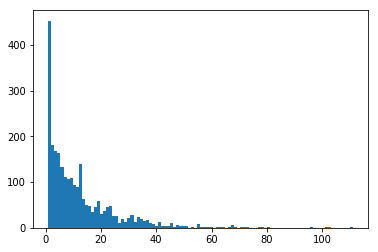

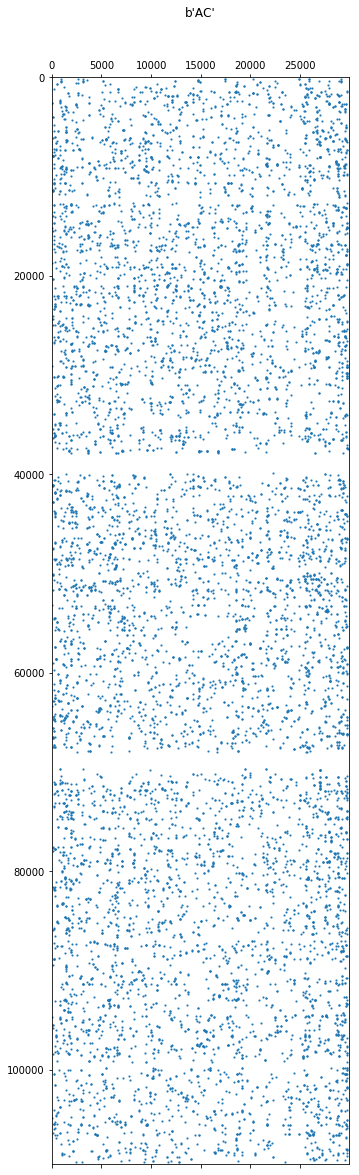

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
15
(1, 29903)
33
0
0.03334113634083537
4.960199004975125
0.5556891083578869


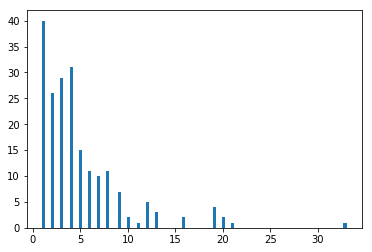

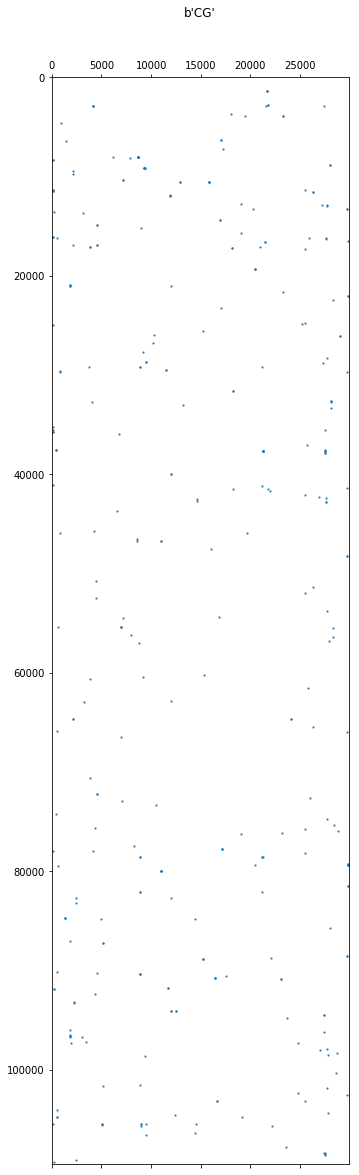

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19
(1, 29903)
116
0
0.19887636691970706
5.486162361623617
1.6051188291643195


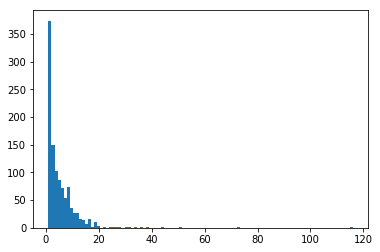

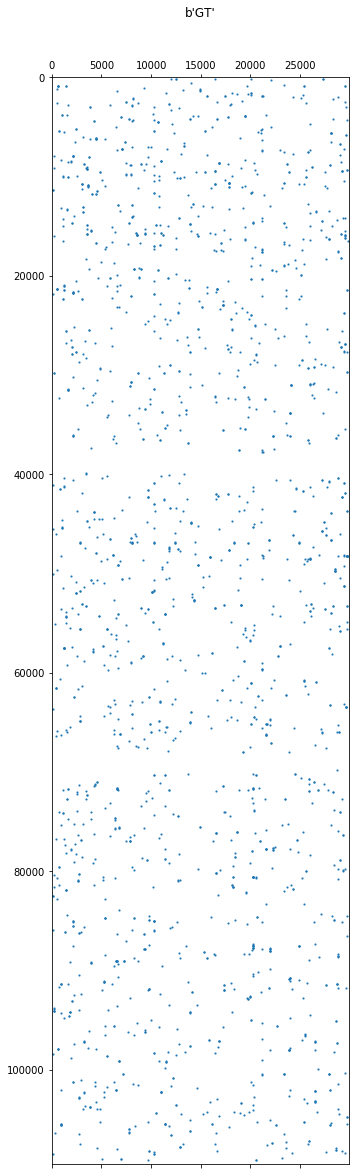

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
12
(1, 29903)
48
0
0.04133364545363342
5.128630705394191
0.6943504759802075


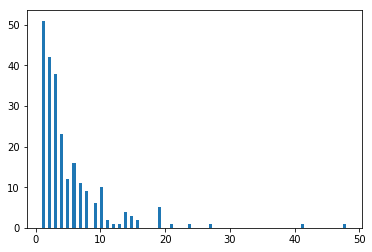

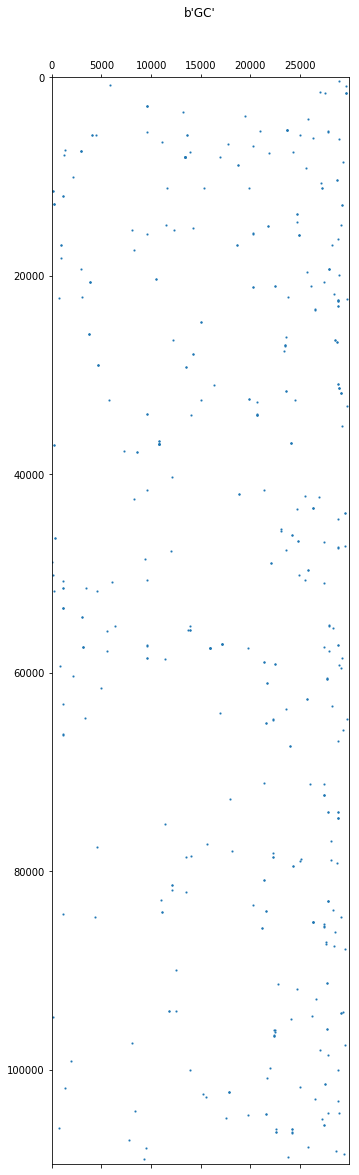

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19
(1, 29903)
21
0
0.03263886566565227
4.45662100456621
0.5143866915381913


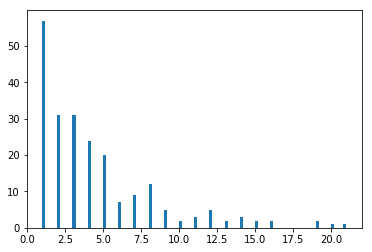

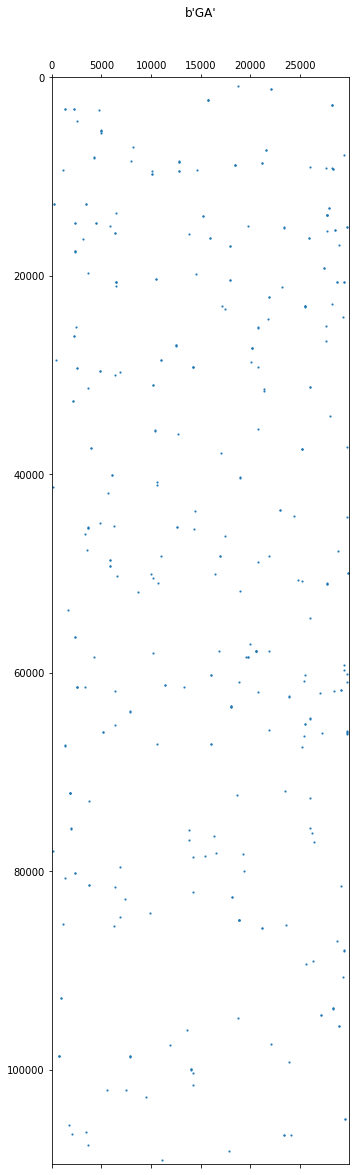

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
16
(1, 29903)
63
0
0.030665819482995016
5.878205128205129
0.6720289394660431


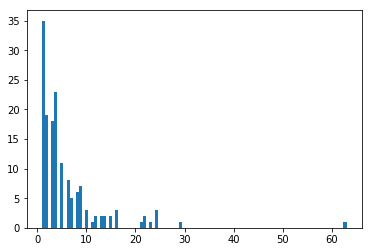

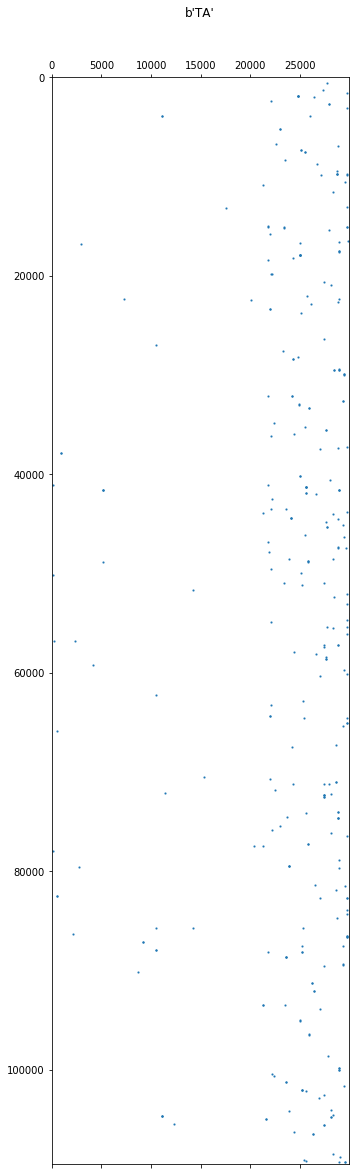

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
20
(1, 29903)
42
0
0.04671772063003712
5.311787072243346
0.7125302844250071


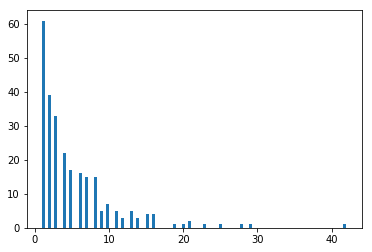

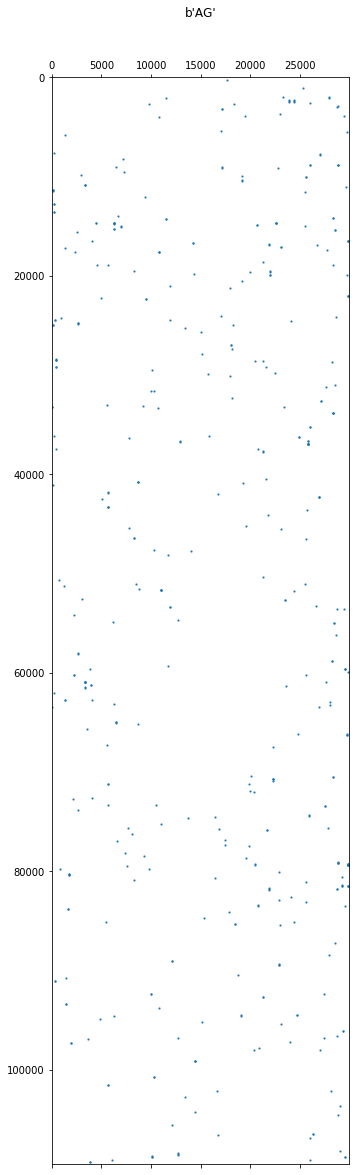

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19
(1, 29903)
54
0
0.027722970939370633
4.605555555555555
0.5607291718794476


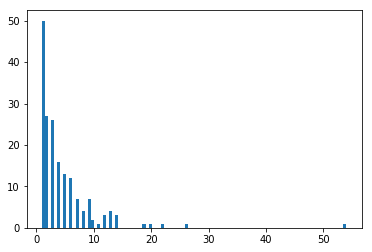

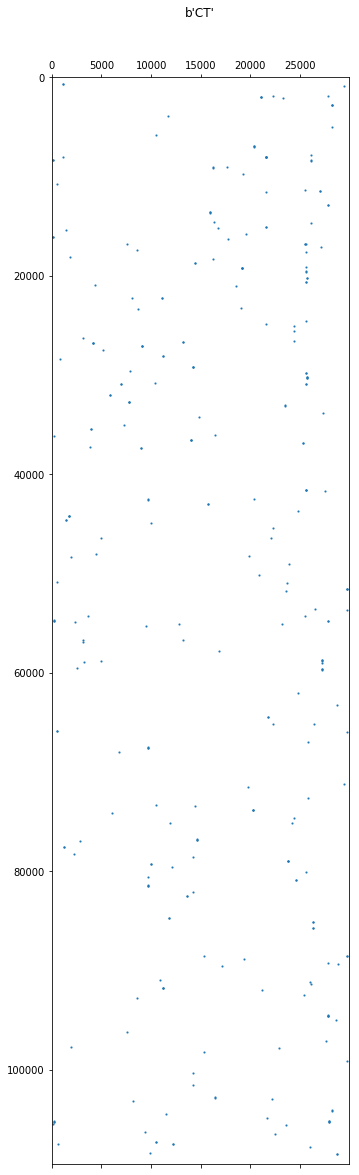

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19
(1, 29903)
116
0
0.23148179112463632
5.502384737678855
1.8222309956440703


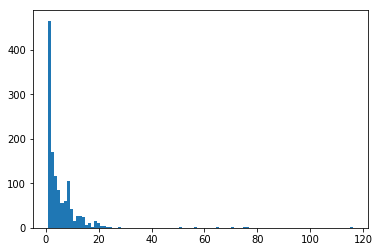

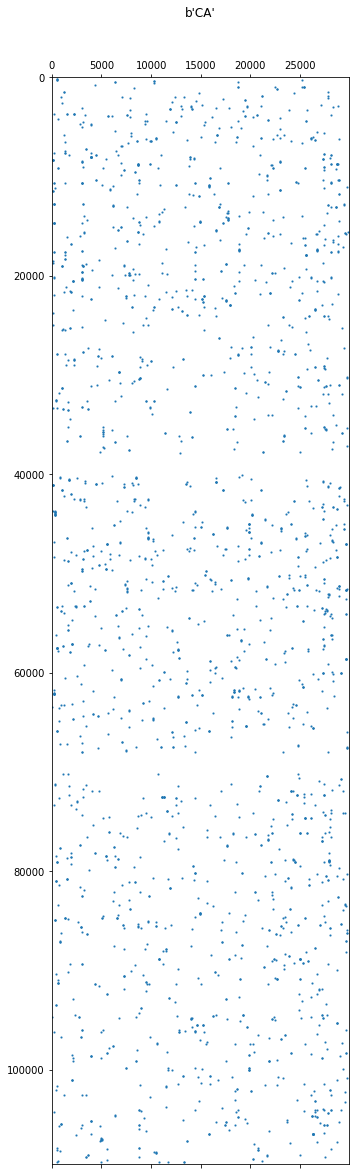

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
20
(1, 29903)
100
0
0.43477243085977996
10.10964230171073
2.9896796232965475


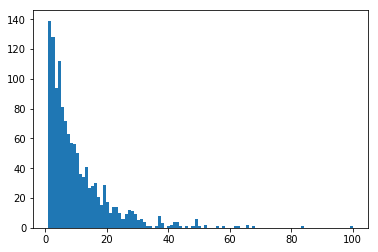

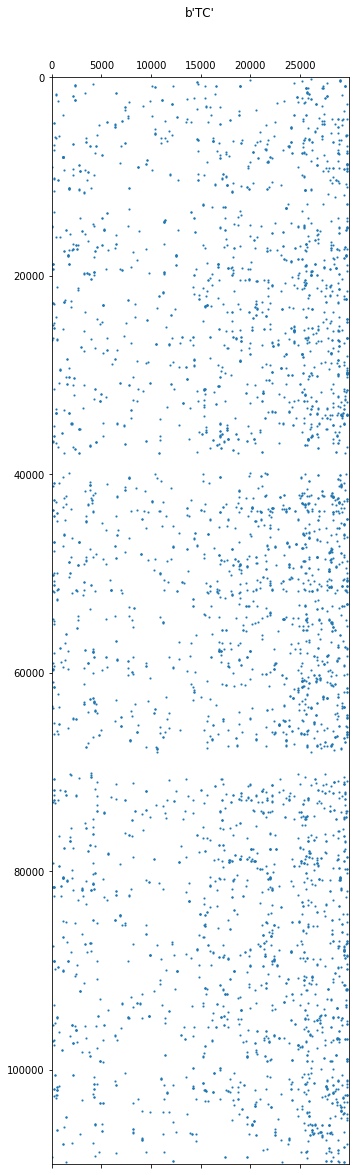

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
20
(1, 29903)
97
0
0.1808514195900077
5.949394939493949
1.5656706124012945


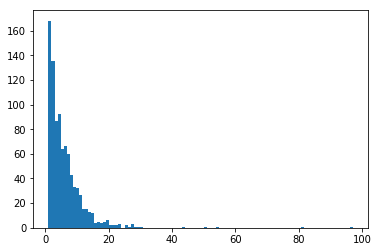

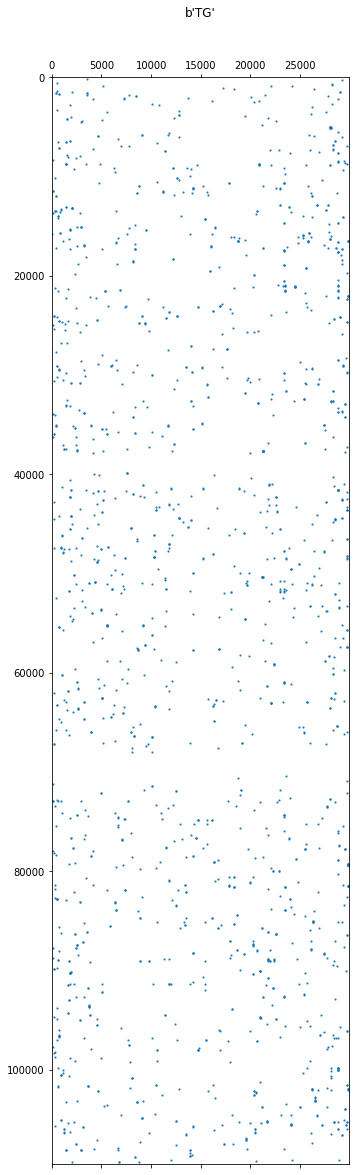

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
14
(1, 29903)
22
0
0.010567501588469384
5.096774193548387
0.31719711160076297


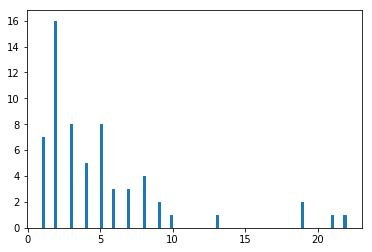

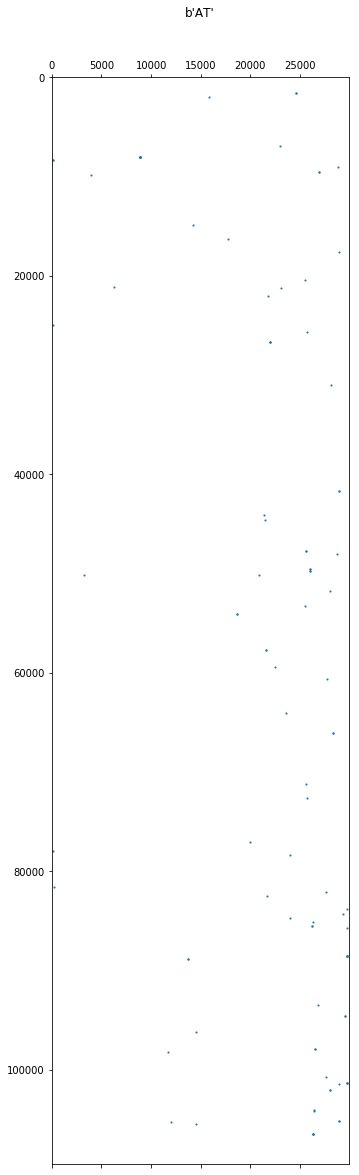

In [23]:
#load sankoff coev mat
for outsankof in eventmats:
    transition_type = outsankof.replace('./lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run'  , '')
    transition_type = int(transition_type.replace( '_coevmat_transitionmatrices.pkl' , '') ) 
    
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())
    coevmat = coevmat.todense()
    print(coevmat)
    print(coevmat.shape)
    print(np.amax(coevmat))
    
    sumv = np.sum(coevmat , axis = 0)
    print(sumv.ravel().shape)
    print(np.amax(sumv))
    print(np.amin(sumv))
    print(np.mean(sumv))
    print(np.mean(sumv[sumv>0]))
    print(np.std(sumv))

    counts,bins = np.histogram(sumv[sumv>0].ravel() , bins = 100)
    centroids = (bins[1:] + bins[:-1]) / 2
    counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)))
    plt.figure( figsize=(30,20))
    plt.title( num2transition[transition_type] )
    plt.spy(coevmat, markersize= 1)
    plt.show()

In [4]:
#load covid geno
import subprocess
import shlex
import pandas as pd 
#collapse codons
#use tblastn to map to prot

def runblastx( qseq , outannot = 'outannot.txt' , outfmt = None ):
    if outfmt is None:
        outfmt = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ]
        outfmt =  ' "10 ' + ''.join([fmt+ ' ' for fmt in outfmt]) + ' " '
        print(outfmt)
    args = 'blastx -query '+ qseq + ' -db covid_prots -outfmt' + outfmt + ' -out ' + outannot  
    p = subprocess.run( shlex.split(args) )
    return p , outannot
out = 'outannot.txt'
p,annot = runblastx( './wuhan.fasta'  )

annotation = pd.read_csv( out , header = None )
annotation.columns = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ] 
annotation = annotation[ annotation['evalue'] < 10**-3 ]
print(annotation)
print(len(annotation), ' orfs detected')

 "10 qseqid sseqid qlen slen qstart qend qframe evalue  " 
         qseqid          sseqid   qlen  slen  qstart   qend  qframe  \
0   NC_045512.2  YP_009724389.1  29903  7096     266  13468       2   
1   NC_045512.2  YP_009724389.1  29903  7096   13462  21552       1   
3   NC_045512.2  YP_009725299.1  29903  1945    2720   8554       2   
7   NC_045512.2  YP_009742610.1  29903  1945    2720   8554       2   
11  NC_045512.2  YP_009724390.1  29903  1273   21596  25381       2   
12  NC_045512.2  YP_009725307.1  29903   932   13462  16236       1   
13  NC_045512.2  YP_009725298.1  29903   638     806   2719       2   
14  NC_045512.2  YP_009742609.1  29903   638     806   2719       2   
15  NC_045512.2  YP_009725308.1  29903   601   16237  18039       1   
16  NC_045512.2  YP_009725309.1  29903   527   18040  19620       1   
17  NC_045512.2  YP_009725300.1  29903   500    8555  10054       2   
18  NC_045512.2  YP_009742611.1  29903   500    8555  10054       2   
19  NC_045512.2  Y

In [5]:
from Bio import Seq , SeqIO

rows = []
for ID in annotation.sseqid.unique():
    #print(annotation[annotation.sseqid == ID ].iloc[0])
    sub = annotation[annotation.sseqid == ID ]
    rows.append(sub.index[0] ) 
annotation = annotation.loc[rows]
print(len(annotation))
rows = []
for ID in annotation.qstart.unique():
    sub = annotation[annotation.qstart == ID ]
    rows.append(sub.index[0] )
annotation = annotation.loc[rows]
print(len(annotation))
genes =  {}
prots = {}
qseq = next(SeqIO.parse( 'wuhan.fasta' , 'fasta'))
print(qseq)
print(len(qseq))
for i,r in annotation.iterrows():
    genes[i] = qseq[r.qstart-1:r.qend-1]
    #print(genes[i])
    prots[i] = genes[i].translate( )
    annotation = annotation.sort_values( ['qstart'] )
annotation['prots'] = annotation.index.map(prots)
annotation['genes'] = annotation.index.map(genes)
annotation['prots'] =annotation['prots'].map(lambda x : ''.join(x).strip())
annotation['genes'] = annotation['genes'].map(lambda x : ''.join(x).strip())


annotation = annotation[annotation.slen < 2000]
aln_regions = np.array(list(zip(list(annotation.qstart),list(annotation.qend))))
aln_regions= aln_regions[1:,:]
aln_len = np.array(list( annotation.qend - annotation.qstart))
annotation = pd.DataFrame.sort_values(annotation, by='qstart')
print(annotation)

36
25
ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903
         qseqid          sseqid   qlen  slen  qstart   qend  qframe  \
13  NC_045512.2  YP_009725298.1  29903   638     806   2719       2   
3   NC_045512.2  YP_009725299.1  29903  1945    2720   8554       2   
17  NC_045512.2  YP_009725300.1  29903   500    8555  10054       2   
21  NC_045512.2  YP_009725301.1  29903   306   10055  10972       2   
25  NC_045512.2  YP_009725302.1  29903   290   10973  11842       2   
41  NC_045512.2  YP_009725303.1  29903    83   11843  12091       2   
32  NC_045512.2  YP_009725304.1  29903   198   12092  12685       2   
37  NC_045512.2  YP_009725305.1  29903   113   12686  13024       2   
34  NC_045512.2  YP_009725306.1  29903   139   13025  13441       2   
12  NC_045512.2  YP_0

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [20]:
#filter for changes relative to wuhan ref.
#!incorrect due to iterative sequential changes.

filtercols = {}
verbose = False
for outsankof in eventmats:
    transition_type = outsankof.replace('./lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run'  , '')
    transition_type = int(transition_type.replace( '_coevmat_transitionmatrices.pkl' , '') )
    transition_char = num2transition[transition_type].decode()
    print(transition_char)
    delcols = []
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())
    coevmat = coevmat.todense()
    print(coevmat)
    print(coevmat.shape)
    print(np.amax(coevmat))
    sumv = np.sum(coevmat , axis = 1)
    eventcols = list(np.where(sumv > 0)[0])
    for k,col in enumerate(eventcols):
        for i,row in annotation.iterrows():
            col1 = row.qstart
            col2 = row.qend
            if col1 < col and col < col2:
                newseq =  list(row.genes)
                if verbose == True and k < 100:
                    print('orignial: ', ''.join(newseq[ col-col1 -3 : col-col1 + 3]) ) 
                newseq[col-col1] = transition_char[1]
                newseq = ''.join(newseq)
                if verbose == True and k < 100:
                    print( 'mut: ', newseq[ col-col1 -3 : col-col1 + 3])
                if Seq.Seq(newseq).translate() == row.prots:
                    delcols.append(col)
    filtercols[transition_type] = delcols

AC
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


CG
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
15


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


GT
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


GC
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
12


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


GA
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


TA
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
16


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


AG
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


CT
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


CA
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


TC
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


TG
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
19


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


AT
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(109535, 29903)
14


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


[6908, 8014, 8041, 8057, 8063, 8400, 9022, 9586, 14889, 22009, 24952, 25646, 26668, 26690, 26692]


In [25]:
#might be interesting to see the spatial distribution of synonymous mutations too

for key in filtercols:
    print(num2transition[key])
    print(len(filtercols[key]))

b'AC'
806
b'CG'
28
b'GT'
243
b'GC'
60
b'GA'
65
b'TA'
31
b'AG'
44
b'CT'
49
b'CA'
264
b'TC'
372
b'TG'
195
b'AT'
15


In [30]:
collapse_mat = None
collapse_mat_filtered = None
for outsankof in eventmats:
    transition_type = outsankof.replace('./lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.alnCOEV_cleantree_mk6bootstrap_runbootstrap_run'  , '')
    transition_type = int(transition_type.replace( '_coevmat_transitionmatrices.pkl' , '') )
    print(num2transition[key])
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())
        coevmat = coevmat.todense()
    if collapse_mat is not None:
        collapse_mat += coevmat 
    else:
        collapse_mat = coevmat
    coevmat[:,filtercols[transition_type]] =0
    if collapse_mat_filtered is not None:
        collapse_mat_filtered += coevmat
    else:
        collapse_mat_filtered = coevmat
    print('done')

In [31]:
print(collapse_mat)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
def sumcodons(submat_coev, annotation):#sum up to codonmat
    print('summing up events on codons')
    codonmat = np.zeros( (submat_coev.shape[0] , int(submat_coev.shape[1]/3) +1  ))
    count = 0
    print(codonmat.shape)
    print(submat_coev.shape)
    '''try:
        submat_coev = submat_coev.todense()
    except AttributeError:
        print( 'already dense')
    '''
    codon_dict = {}
    for i,r in annotation.iterrows():
        for j,codon in enumerate(range(r.qstart-1, r.qend-1 , 3 )):
            codon_dict[codon] = count
            cols = np.sum( submat_coev[:, codon:codon+2] , axis = 1 )
            codonmat[:,count] = cols.ravel()
            count+=1
            if count%500 == 0:
                print(count/codonmat.shape[1])
    return codonmat


In [36]:
from sklearn.cluster import MiniBatchKMeans , DBSCAN
import sklearn

def return_clustering(codonmat):
    apb = MiniBatchKMeans(n_clusters=100, init='k-means++', max_iter=100, batch_size=200, verbose=1, compute_labels=True , random_state= 0   )
    #apb = DBSCAN( eps = .5 , metric='cosine', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=-1)
    cluster_labels_codon = apb.fit_predict(codonmat.T )
    return cluster_labels_codon


In [44]:
tree = dendropy.Tree.get(
    path=treefile,
    schema='newick')
for l in tree.leaf_nodes()[0:10]:
    print(str(l.taxon))
print(len(tree.leaf_nodes()))
print('leaves')

for i,n in enumerate(tree.nodes()):
    n.matrow = i
    n.symbols = None
    n.scores = None
    n.event = None
    n.char = None
matsize = len(tree.nodes())
print(matsize)
print('nodes')

'EPI ISL 475635'
'EPI ISL 425848'
'EPI ISL 433289'
'EPI ISL 439066'
'EPI ISL 433434'
'EPI ISL 417064'
'EPI ISL 434563'
'EPI ISL 434564'
'EPI ISL 425865'
'EPI ISL 464788'
54768
leaves
109535
nodes


In [45]:
#blur w connectivity mat
blurfactor =  .5
bluriter = 4
connectmat = scipy.sparse.lil_matrix((len(tree.nodes()), len(tree.nodes() ) ) )
index = np.array([ [n.matrow, c.matrow ] for n in tree.nodes() for c in n.child_nodes()])
connectmat[index[:,0],index[:,1]] = 1
connectmat[index[:,1],index[:,0]] = 1



In [ ]:
#cluster at diff levels of jackknife 
#filter cols from each mat that are synonimous mutations
clustersets = {}

bluriter = 4
blurfactor = .5

for thresh in [ 0, 5 , 10 , 15]:
    if thresh not in clustersets:
        clustersets[thresh] = {}
    for i,mat in enumerate([collapse_mat , collapse_mat_filtered ]):
        submat = mat
        submat[submat<thresh] = 0
        codonmat = sumcodons(mat , annotation )
        if i not in clustersets[thresh]:
            clustersets[thresh][i] = {}
        for j,blur in enumerate([True , False]):
            if blur == True:
                for i in range( bluriter):
                    codonmat += np.dot(blurfactor*connectmat, codonmat)
                    print('blurring')
                    print(i)
            cluster_labels =  return_clustering(codonmat)
            clustersets[thresh][i][j] = cluster_labels            
            l,c = np.unique(cluster_labels, return_counts= True)
            print(len(l))
            print(c)


summing up events on codons
(109535, 9968)
(109535, 29903)
0.05016051364365971
0.10032102728731943
0.15048154093097912
0.20064205457463885
0.25080256821829855
0.30096308186195825
0.351123595505618
0.4012841091492777
0.4514446227929374
0.5016051364365971
0.5517656500802568
0.6019261637239165
0.6520866773675762
0.702247191011236
0.7524077046548957
0.8025682182985554
0.8527287319422151
0.9028892455858748
0.9530497592295345


In [33]:
#save codon clustering
with open( alnfile+'cluster_iter.pkl' , 'wb')as clusterout:
    clusterout.write( pickle.dumps( clustersets ))

In [58]:
#create the connectivity mat and use it to blur the coev mat
tree = dendropy.Tree.get(
    path=treefile,
    schema='newick')
for l in tree.leaf_nodes()[0:10]:
    print(str(l.taxon))
print(len(tree.leaf_nodes()))
print('leaves')

for i,n in enumerate(tree.nodes()):
    n.matrow = i
    n.symbols = None
    n.scores = None
    n.event = None
    n.char = None
matsize = len(tree.nodes())
print(matsize)
print('nodes')

'EPI ISL 475635'
'EPI ISL 425848'
'EPI ISL 433289'
'EPI ISL 439066'
'EPI ISL 433434'
'EPI ISL 417064'
'EPI ISL 434563'
'EPI ISL 434564'
'EPI ISL 425865'
'EPI ISL 464788'
54768
leaves
109535
nodes


In [60]:
splitrange = (500, 5000)
bins =[]
def split_tree( n , splitrange , bins):
    for c in n.child_nodes():
        progeny = [ d for d in  c.ageorder_iter() ] 
        if len(progeny ) > splitrange[0] and len(progeny) < splitrange[1]:
            bins.append(c)
        else:
            split_tree( c , splitrange , bins )
    return bins

bins =[]
bins = split_tree(tree.seed_node, splitrange, bins)
binsize = [ len( [ n for n in c.ageorder_iter() ]) for c  in bins]

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
plt.figure( figsize=(20,20))
plt.spy(connectmat, markersize= 1)
plt.show()

In [15]:
#apply blur a few times

#for differnt thresh blur and clsuter

#compare cluster positions
blurmat = copy.deepcopy(scipy.sparse.lil_matrix(coevmat))
print(connectmat.shape)
print(blurmat.shape)
for i in range( bluriter):
    blurmat += np.dot(blurfactor*connectmat, blurmat)
    print('blurring')
    print(i)


(109535, 109535)
(109535, 29903)
blurring
0
blurring
1
blurring
2
blurring
3


In [18]:
with open(alnfile+'blurmatr3.pkl' , 'wb') as blurout:
    blurout.write( pickle.dumps(blurmat ))


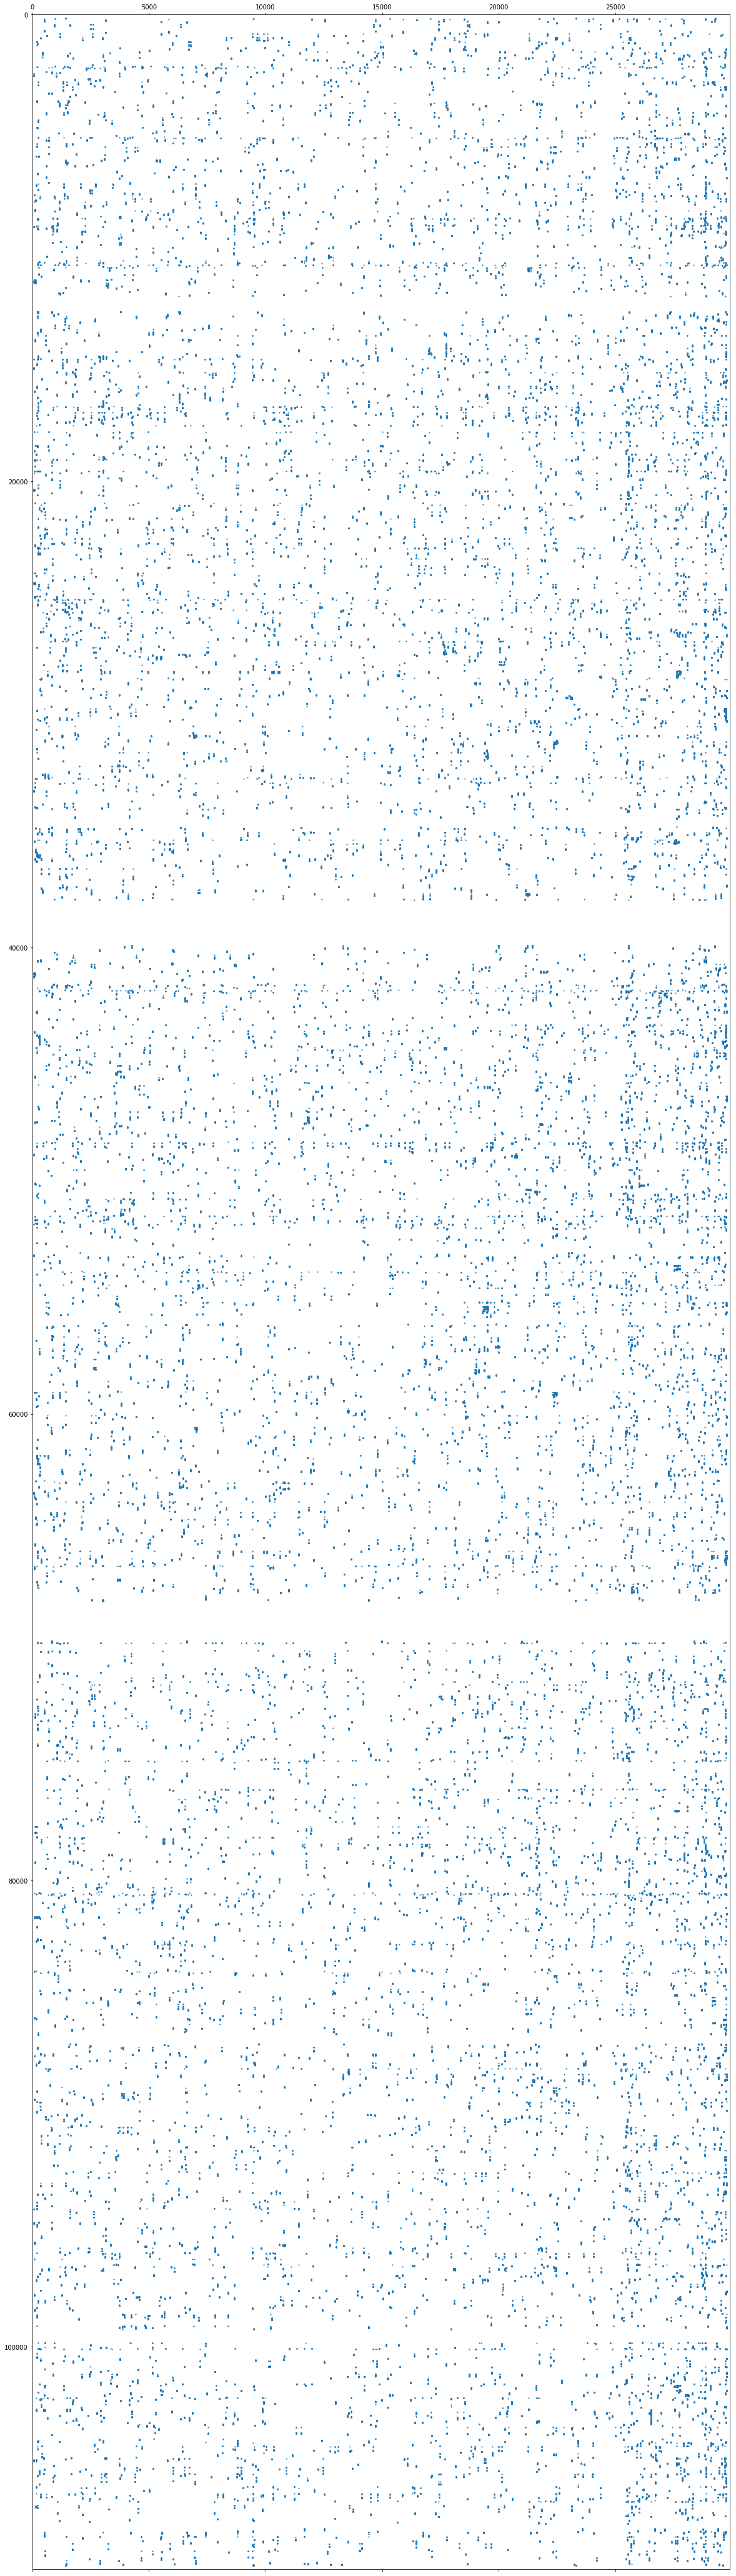

In [19]:
plt.figure( figsize=(20,200))
plt.spy(blurmat , markersize= 1)
plt.show()